# Obtaining the dataset

In [ ]:
import pandas as pd

In [78]:
df = pd.read_csv('train_users_2.csv')

In [3]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [ ]:
#TOTAL ROWS 213k
#date account created = 2010 - 2014
#timestanp first active - has to be transformed to a date
#date first booking - should be dropped? - 124542 is NaN - same as the number of users who have not booked
#gender - 63k female, 54k male, 94k unknown
#age - numerical, needs cleaning
#sign up method - 3 categories
#sign up flow - WHAT IS THIS? - values from 0 to 25
#language - cca 20 categories
#affiliate channel - 8 categories
#affiliate provider - 18 categories
#first affiliare tracked - 7 categories
#sign up app - 4 categories
#first device type - 9 categories
#first browser = 30? categories, vast majority in the top 5
# country of destination = target

### Obtaining 'sessions' dataset

In [142]:
sessions = pd.read_csv('sessions.csv')

In [144]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


## Data preparation and cleaning

### Redefining target

In [79]:
#redefining target
#user who made a booking = 1
#user who did not make a booking = 0
df.loc[(df['country_destination'] != 'NDF','country_destination')] = 1
df.loc[(df['country_destination'] == 'NDF','country_destination')] = 0

In [80]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### Dropping unnecessary columns

In [81]:
#drop date_first_booking - this column copies the target column and would cause data leakage
df.drop('date_first_booking',axis=1, inplace=True)
df.head()

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### Manipulating date_account_created and timestamp_first_active columns

In [82]:
df['date_account_created']= pd.to_datetime(df['date_account_created']) 
df['timestamp_first_active']= pd.to_datetime(df['timestamp_first_active'])


In [83]:
df.head() # timestamp_first_active shows incorrect dates, NEEDS FIXING!!

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,1


### Gender column

In [84]:
df.gender.value_counts()

-unknown-    95688
FEMALE       63041
MALE         54440
OTHER          282
Name: gender, dtype: int64

### Age column

In [85]:
df.age.isna().sum()
#this column has 87990 missing values, that is more than a third of the dataset

87990

In [86]:
df.age.value_counts()
#there are numerous errors in this column and many missing values
#for the sake of simplicity, remove all rows with errors and replace missing values with median age

#finding all ages over 100
indexNames = df[df['age'] > 110].index
 
#deleting these row indexes from dataFrame
df.drop(indexNames, inplace=True)

#replacing NaNs with median
df['age'].fillna((df['age'].median()), inplace=True)


df.age.isna().sum()

In [98]:
df.signup_flow.value_counts()
#the page a user came to signup up from
#What does this mean?

0     164091
25     14645
12      9315
3       8773
2       6846
24      4315
23      2827
1       1033
6        297
8        240
21       195
5         35
20        14
16        11
15        10
10         2
4          1
Name: signup_flow, dtype: int64

In [103]:
df.language.value_counts()
#since vast majority is english, this column might not bring much information.
#Also, it would create many caterogies and increase the dimensionality
#For not, I will drop whis column from the dataset
df.drop('language', axis =1, inplace=True)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,1970-01-01 05:34:50.319043255,-unknown-,34.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Chrome,0
1,820tgsjxq7,2011-05-25,1970-01-01 05:34:50.523174809,MALE,38.0,facebook,0,seo,google,untracked,Web,Mac Desktop,Chrome,0
2,4ft3gnwmtx,2010-09-28,1970-01-01 05:34:50.609231247,FEMALE,56.0,basic,3,direct,direct,untracked,Web,Windows Desktop,IE,1
3,bjjt8pjhuk,2011-12-05,1970-01-01 05:34:51.031060129,FEMALE,42.0,facebook,0,direct,direct,untracked,Web,Mac Desktop,Firefox,1
4,87mebub9p4,2010-09-14,1970-01-01 05:34:51.208061105,-unknown-,41.0,basic,0,direct,direct,untracked,Web,Mac Desktop,Chrome,1


In [104]:
df.columns

Index(['id', 'date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination'],
      dtype='object')

In [107]:
df.affiliate_provider.value_counts()
#some categories are very under-represented, might need further scrubbing

direct                 136919
google                  51489
other                   12504
craigslist               3446
bing                     2320
facebook                 2268
vast                      827
padmapper                 766
facebook-open-graph       544
yahoo                     495
gsp                       452
meetup                    347
email-marketing           166
naver                      52
baidu                      29
yandex                     17
wayn                        8
daum                        1
Name: affiliate_provider, dtype: int64

In [108]:
df.first_affiliate_tracked.isna().sum()
#whats the first marketing the user interacted with before the signing up
#6030 missing values

6030

In [113]:
df.first_affiliate_tracked.value_counts()

untracked        108854
linked            46089
omg               43836
tracked-other      6123
product            1545
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [121]:
#replacing NaNs with the most common value 'untracked"'
df.first_affiliate_tracked.fillna('untracked',inplace=True)

In [140]:
df.first_browser.value_counts()
#many under-represented categories
#top 6 browsers = 209 509 users = 98.5% of users
#I will turn the remaining categories into 'other'

df.loc[(df.first_browser != 'Chrome') & (df.first_browser != 'Safari')& (df.first_browser != 'Firefox')& (df.first_browser != '-unknown-')& (df.first_browser != 'Mobile Safari')& (df.first_browser != 'IE'),'first_browser']='other'

Chrome           63620
Safari           44991
Firefox          33512
-unknown-        27199
IE               20977
Mobile Safari    19201
other             3150
Name: first_browser, dtype: int64

In [141]:
df.first_browser.value_counts()

Chrome           63620
Safari           44991
Firefox          33512
-unknown-        27199
IE               20977
Mobile Safari    19201
other             3150
Name: first_browser, dtype: int64

## Preparing 'sessions' dataset

In [147]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [149]:
len(sessions.user_id.unique())

135484

In [150]:
len(df.id.unique())

212650

In [151]:
len(df)

212650

## Fitting first model just for fun (without sessions data)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212650 entries, 0 to 213450
Data columns (total 14 columns):
id                         212650 non-null object
date_account_created       212650 non-null datetime64[ns]
timestamp_first_active     212650 non-null datetime64[ns]
gender                     212650 non-null object
age                        212650 non-null float64
signup_method              212650 non-null object
signup_flow                212650 non-null int64
affiliate_channel          212650 non-null object
affiliate_provider         212650 non-null object
first_affiliate_tracked    212650 non-null object
signup_app                 212650 non-null object
first_device_type          212650 non-null object
first_browser              212650 non-null object
country_destination        212650 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(2), object(9)
memory usage: 24.3+ MB


In [161]:
df_dummies = pd.get_dummies(data=df, columns=['gender', 'signup_method','affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser'])

In [163]:
len(df_dummies.columns)

66

In [176]:
#dropping ID columns
df_dummies.drop('id',axis=1, inplace= True)

df_dummies.drop('date_account_created',axis=1, inplace= True)

df_dummies.drop('timestamp_first_active',axis=1, inplace= True)

In [177]:
X = df_dummies.drop('country_destination',axis=1)
y = df_dummies.country_destination

In [185]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [181]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=10) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

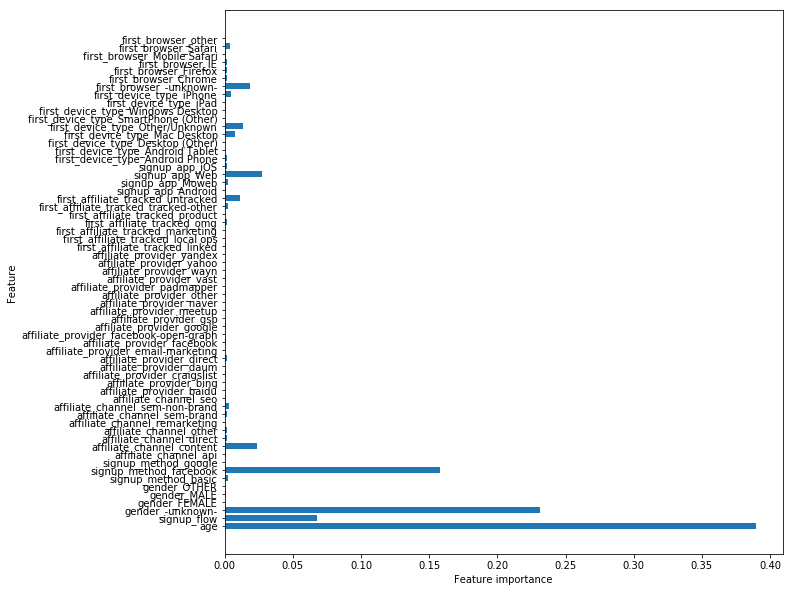

In [187]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [188]:
# Test set predictions
pred = tree_clf.predict(X_test)

# Confusion matrix and classification report
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[19694  5083]
 [ 7895  9858]]
              precision    recall  f1-score   support

           0       0.71      0.79      0.75     24777
           1       0.66      0.56      0.60     17753

   micro avg       0.69      0.69      0.69     42530
   macro avg       0.69      0.68      0.68     42530
weighted avg       0.69      0.69      0.69     42530



In [189]:
print("Testing Accuracy for Decision Tree Classifier: {:.4}%".format(accuracy_score(y_test, pred) * 100))

Testing Accuracy for Decision Tree Classifier: 69.49%


## Trying random forest

In [202]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth= 20)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [203]:
forest.score(X_train, y_train)

0.7506759934164119

In [209]:
forest.score(X_test, y_test)

0.6861274394545027

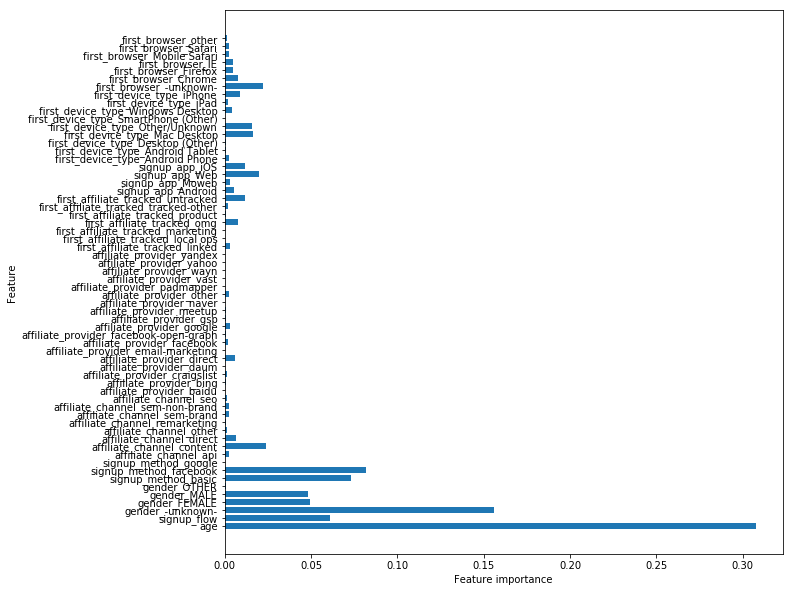

In [195]:
plot_feature_importances(forest)